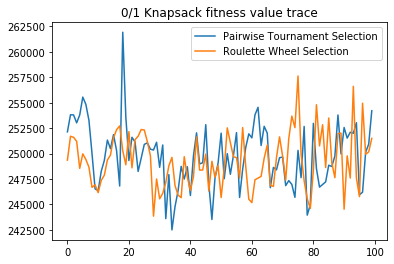

In [27]:
import matplotlib.pyplot as plt
import random
import numpy as np


def read_data(filename):
    """Parse problem specifications from the data file."""
    with open(filename, "r") as f:
        # header
        for line in f:
            iwp = line.strip().split()
            if len(iwp) >= 4 and iwp[2] == "capacity":
                capacity = float(iwp[3])
            elif iwp == ["item_index", "weight", "profit"]:
                table = True
                break
        if not table:
            raise ValueError("table not found.")
        # body
        weights = []
        profits = []
        for line in f:
            i, w, p = line.strip().split()
            weights.append(float(w))
            profits.append(float(p))
    return capacity, weights, profits

def fitness_function(individual, capacity, weights, profits):
    """Calculate fitness value of an individual."""
    sum_weight = 0
    sum_profit = 0
    for bit, weight, profit in zip(individual, weights, profits):
        if bit == 1:
            sum_weight += weight
            sum_profit += profit

    fitness = sum_profit if sum_weight <= capacity else 0
    return fitness


def initialize():
    return [spawn_individual() for x in range (0,100)]

def spawn_individual():
    return [random.randint(0,1) for x in range (0,10000)]

def mutate(population):
    for i in range(100):
        for k in range(10000):
            if np.random.rand()<0.01:
                if population[i][k]==1:
                    population[i][k]= 0
                else:
                    population[i][k]= 1
                   

                
def sorting(X,Y):
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    for i in range(len(X)):
        
        X[i]=X[idx[i]]
        Y[i]=Y[idx[i]]
                    
def Roulette_Wheel_Selection (population,fitness):
    for i in range(100):
        x= np.random.rand()
        k=0
        while k < 100 and x > (sum(fitness[:k+1])/sum(fitness)):
            k+=1
        population[i]=population[k]

def tournament_Selection (population, fitness):
    for i in range(100):
        x=random.randint(0,99)
        if fitness[i]<fitness[x]:
            population[i]=population[x]

def three_point_crossover(population):
    for i in range (0,50):
        if np.random.rand()<0.9:
            pos = [random.randint(0,9999) for _ in range(3)]
            pos.sort()
            for k in range(pos[0]+1,pos[1]+1):
                aux=population[i][k]
                population[i][k]=population[i+50][k]
                population[i+50][k]=aux
            for j in range(pos[2]+1,100):
                aux=population[i][j]
                population[i][j]=population[i+50][j]
                population[i+50][j]=aux
            

def visualize (data1,data2):    
    plt.title("0/1 Knapsack fitness value trace")
    plt.plot(range(100), data2, label="Pairwise Tournament Selection")
    plt.plot(range(100), data1, label="Roulette Wheel Selection")
    plt.legend()
    plt.savefig('./test.png')
    plt.show()
    
            
if __name__ == '__main__':
    filename = "Data(0-1Knapsack).txt"
    spec=read_data(filename)
    pop1=initialize()
    pop2=initialize()
    fitness = list(range(0,100))
    fitness2 = list(range(0,100))
    history=list(range(0,100))
    history2=list(range(0,100))
    for i in range(100):
        fitness[i] = fitness_function(pop1[i],spec[0],spec[1],spec[2])
        fitness2[i] = fitness_function(pop2[i],spec[0],spec[1],spec[2])
    
    for g in range(0,100):
        Roulette_Wheel_Selection(pop1,fitness)
        tournament_Selection(pop2,fitness2)
        sorting(pop1,fitness)
        sorting(pop2,fitness2)
        three_point_crossover(pop1)
        three_point_crossover(pop2)
        mutate(pop1)
        mutate(pop2)
        for i in range(100):
            fitness[i] = fitness_function(pop1[i],spec[0],spec[1],spec[2])
            fitness2[i] = fitness_function(pop2[i],spec[0],spec[1],spec[2])
        
        history[g]=sum(fitness)/len(fitness)
        history2[g]=sum(fitness2)/len(fitness2)
    visualize(history,history2)
   
    txt = ""
    for i in range(100):
        txt += "{},{:.6f}\n".format(pop1[i], fitness[i])
    with open("roulette", "w") as f:
        f.write(txt)

    txt = ""
    for j in range(100):
        txt += "{},{:.6f}\n".format(pop2[j], fitness2[j])
    with open("tournament", "w") as f:
        f.write(txt)  
        
        
        
        
    
        
        
    ##generate_example("Data(0-1Knapsack).txt", "trace.png", "tournament.txt", "roulette.txt")
    ##print("Done!")